In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

RANDOM_SEED = 42
tf.keras.utils.set_random_seed(RANDOM_SEED)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/test.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/dev.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/train.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/test.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT_numbers_replaced_with_at_sign/train/train.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/dev.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/test.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/dev.txt
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/train.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/test.csv
/kaggle/input/pubmed-200k-rtc/PubMed_200k_RCT/train/train.txt
/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/dev.csv
/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/test.txt
/kaggle/input/pubmed-200k-rtc/PubMed_20k_

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7e81c8df-7448-fa4d-cd3d-f6d74703cc88)
GPU 1: Tesla T4 (UUID: GPU-a2c4b271-bd19-d034-6f6f-e61f81db9ff2)


# 1] Data Ingestion

In [3]:
TRAIN_CSV_FILE_LOCATION = '/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/train.csv'
VAL_CSV_FILE_LOCATION = '/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/dev.csv'
TEST_CSV_FILE_LOCATION = '/kaggle/input/pubmed-200k-rtc/PubMed_20k_RCT/test.csv'

In [4]:
train_df = pd.read_csv(TRAIN_CSV_FILE_LOCATION)
train_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,target
0,24293578,24293578_0_12,To investigate the efficacy of 6 weeks of dail...,0,12,OBJECTIVE
1,24293578,24293578_1_12,A total of 125 patients with primary knee OA w...,1,12,METHODS
2,24293578,24293578_2_12,Outcome measures included pain reduction and i...,2,12,METHODS
3,24293578,24293578_3_12,Pain was assessed using the visual analog pain...,3,12,METHODS
4,24293578,24293578_4_12,Secondary outcome measures included the Wester...,4,12,METHODS


In [5]:
val_df = pd.read_csv(VAL_CSV_FILE_LOCATION)
val_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,target
0,24290286,24290286_0_10,IgE sensitization to Aspergillus fumigatus and...,0,10,BACKGROUND
1,24290286,24290286_1_10,It is not clear whether these patients would b...,1,10,BACKGROUND
2,24290286,24290286_2_10,We sought to determine whether a 3-month cours...,2,10,OBJECTIVE
3,24290286,24290286_3_10,Asthmatic patients who were IgE sensitized to ...,3,10,METHODS
4,24290286,24290286_4_10,Primary outcomes were improvement in quality o...,4,10,METHODS


In [6]:
test_df = pd.read_csv(TEST_CSV_FILE_LOCATION)
test_df.head()

,abstract_id,line_id,abstract_text,line_number,total_lines,target
0,24845963,24845963_0_9,This study analyzed liver function abnormaliti...,0,9,BACKGROUND
1,24845963,24845963_1_9,A post hoc analysis was conducted with the use...,1,9,RESULTS
2,24845963,24845963_2_9,Liver function tests ( LFTs ) were measured at...,2,9,RESULTS
3,24845963,24845963_3_9,Survival analyses were used to assess the asso...,3,9,RESULTS
4,24845963,24845963_4_9,The percentage of patients with abnormal LFTs ...,4,9,RESULTS


# 2] Exploratory Data Analysis

## 2/a] The Train Set

In [7]:
train_df.shape

(180040, 6)

In [8]:
CLASSES = ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS']
CLASSES

['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS']

In [9]:
train_tally = train_df['target'].value_counts()
train_tally

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

METHODS        0.329666
RESULTS        0.321890
CONCLUSIONS    0.150900
BACKGROUND     0.120679
OBJECTIVE      0.076866
Name: target, dtype: float64

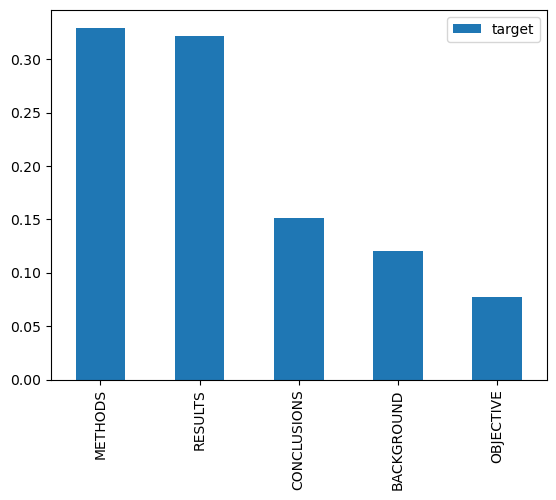

In [10]:
pd.DataFrame(train_tally/sum(train_tally)).plot(kind='bar')
norm_train_tally = train_tally/sum(train_tally)
norm_train_tally

📘 **NOTES**
* There are `5` classes for this dataset.
* There are `180040` records for the train set. Note that each record is a line on the medical abstract.
* This is an *imbalanced* dataset with `2` of the classes comprising `~30%`of the dataset. The least class comprises `~7%` of the dataset.

## 2/b] The Validation Set

In [11]:
val_df.shape

(30212, 6)

In [12]:
val_tally = val_df['target'].value_counts()
val_tally

METHODS        9964
RESULTS        9841
CONCLUSIONS    4582
BACKGROUND     3449
OBJECTIVE      2376
Name: target, dtype: int64

METHODS        0.329803
RESULTS        0.325731
CONCLUSIONS    0.151662
BACKGROUND     0.114160
OBJECTIVE      0.078644
Name: target, dtype: float64

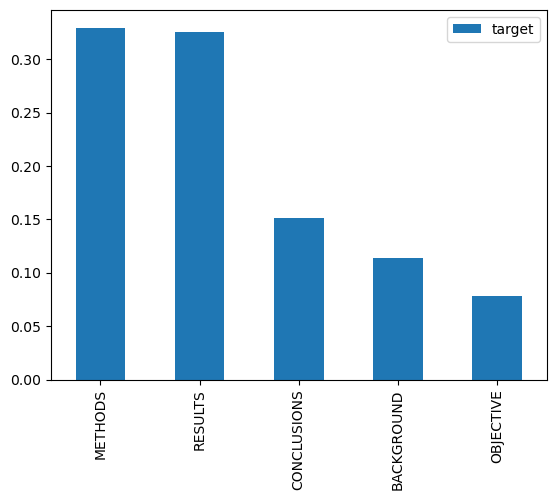

In [13]:
pd.DataFrame(val_tally/sum(val_tally)).plot(kind='bar')
norm_val_tally = val_tally/sum(val_tally)
norm_val_tally

## 2/c] The Test Set

In [14]:
test_df.shape

(30135, 6)

In [15]:
test_tally = test_df['target'].value_counts()
test_tally

METHODS        9897
RESULTS        9713
CONCLUSIONS    4571
BACKGROUND     3621
OBJECTIVE      2333
Name: target, dtype: int64

METHODS        0.328422
RESULTS        0.322316
CONCLUSIONS    0.151684
BACKGROUND     0.120159
OBJECTIVE      0.077418
Name: target, dtype: float64

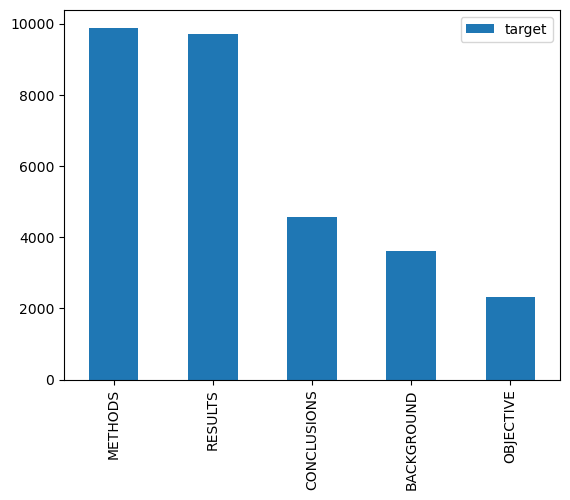

In [16]:
pd.DataFrame(test_tally).plot(kind='bar')
norm_test_tally = test_tally/sum(test_tally)
norm_test_tally

## 2/d] Compare class distributions of the different datasets

<Axes: >

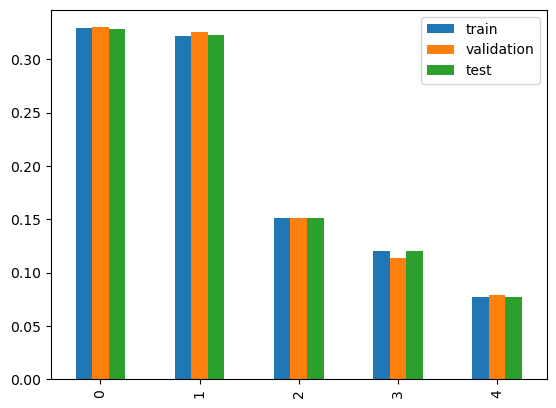

In [17]:
pd.DataFrame(zip(norm_train_tally, norm_val_tally, norm_test_tally), columns=['train', 'validation','test']).plot(kind='bar')

📘 **NOTES**
* The distribution ofthe classes between `train`, `validation`, and `test` sets are quite similar. Nice stratification!


# 3] Modelling

* **Model 0 (baseline):** Multinomial Naive Bayes


## 3/a] Preprocessing the dataset

In [18]:
def features_class_split(dataset):
    return dataset['abstract_text'], dataset['target']

In [19]:
X_train, y_train = features_class_split(train_df)
X_train.shape, y_train.shape

((180040,), (180040,))

In [20]:
X_train

0         To investigate the efficacy of 6 weeks of dail...
1         A total of 125 patients with primary knee OA w...
2         Outcome measures included pain reduction and i...
3         Pain was assessed using the visual analog pain...
4         Secondary outcome measures included the Wester...
                                ...                        
180035    For the absolute change in percent atheroma vo...
180036    For PAV , a significantly greater percentage o...
180037    Both strategies had acceptable side effect pro...
180038    Compared with standard statin monotherapy , th...
180039    ( Plaque Regression With Cholesterol Absorptio...
Name: abstract_text, Length: 180040, dtype: object

In [21]:
y_train

0           OBJECTIVE
1             METHODS
2             METHODS
3             METHODS
4             METHODS
             ...     
180035        RESULTS
180036        RESULTS
180037        RESULTS
180038    CONCLUSIONS
180039    CONCLUSIONS
Name: target, Length: 180040, dtype: object

In [22]:
X_val, y_val = features_class_split(val_df)
X_val.shape, y_val.shape

((30212,), (30212,))

In [23]:
X_test, y_test = features_class_split(test_df)
X_test.shape, y_test.shape

((30135,), (30135,))

## 3/b] **Model 0 (baseline):** Multinomial Naive Bayes

### The Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
results = vectorizer.fit_transform(X_train)
results.shape

(180040, 57996)

In [25]:
vocabulary = vectorizer.get_feature_names_out()
vocabulary

array(['00', '000', '0000', ..., 'zygomaticotemporal', 'zygote',
       'zygotes'], dtype=object)

In [26]:
len(vocabulary)

57996

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

def build_model_0():
    return Pipeline([
        ('vectorizer', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])
    

model_0 = build_model_0()
model_0

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
model_0.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
model_0_predictions = model_0.predict(X_val)

model_0_predictions.shape, model_0_predictions[:5]

((30212,),
 array(['BACKGROUND', 'CONCLUSIONS', 'OBJECTIVE', 'METHODS', 'METHODS'],
       dtype='<U11'))

In [30]:
from sklearn.metrics import precision_recall_fscore_support

def score_predictions(y_true, y_predictions):
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_predictions, labels=CLASSES, average='weighted')
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

score_predictions(y_val, model_0_predictions)

{'precision': 0.7315166696974572,
 'recall': 0.7317291142592347,
 'f1': 0.7058060715307974}

In [31]:
def show_sample_predictions(model_predictions, n=10):
    return pd.DataFrame(zip(X_val[:n], y_val[:n], model_predictions[:n], (y_val[:n] == model_predictions[:n])), 
                        columns=['Sentence', 'True Label', 'Prediction', 'Correct?'])

show_sample_predictions(model_0_predictions)

,Sentence,True Label,Prediction,Correct?
0,IgE sensitization to Aspergillus fumigatus and...,BACKGROUND,BACKGROUND,True
1,It is not clear whether these patients would b...,BACKGROUND,CONCLUSIONS,False
2,We sought to determine whether a 3-month cours...,OBJECTIVE,OBJECTIVE,True
3,Asthmatic patients who were IgE sensitized to ...,METHODS,METHODS,True
4,Primary outcomes were improvement in quality o...,METHODS,METHODS,True
5,Sixty-five patients were randomized .,RESULTS,METHODS,False
6,Fifty-nine patients started treatment ( 32 rec...,RESULTS,RESULTS,True
7,Fifty-six patients took the full 3 months of m...,RESULTS,METHODS,False
8,"Between the voriconazole and placebo groups , ...",RESULTS,RESULTS,True
9,We were unable to show a beneficial effect of ...,CONCLUSIONS,RESULTS,False


## 3/b] **Model 1 (RNN model 1):** LSTM model

### Find the appropriate sentence length

In [32]:
sentence_lengths = pd.DataFrame([len(sentence.split()) for sentence in X_train], columns=['sentence length'])

,sentence length
count,180040.000000
mean,26.338436
std,15.386976
min,1.000000
25%,16.000000
50%,23.000000
75%,33.000000
max,296.000000


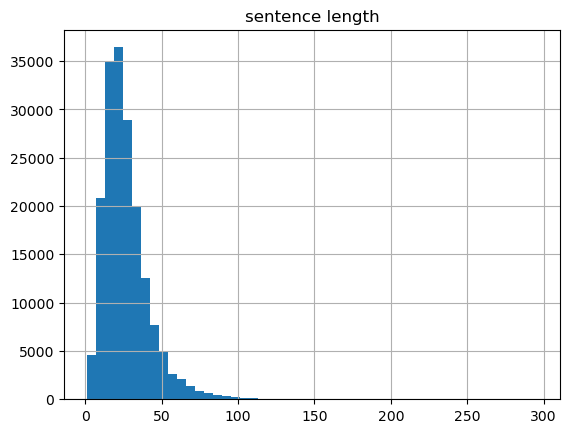

In [33]:
sentence_lengths.hist(bins=50)
sentence_lengths.describe()

In [34]:
SENTENCE_LENGTH = int(np.percentile(sentence_lengths, 90))
SENTENCE_LENGTH

45

### Explore TF vectorizer

In [35]:
from tensorflow.keras.layers import TextVectorization

VOCABULARY_LENGTH = 5000
vectorizer = TextVectorization(
    max_tokens = VOCABULARY_LENGTH,
    output_mode="int",
    output_sequence_length=SENTENCE_LENGTH
)
vectorizer.adapt(X_train)

In [36]:
vocabulary = vectorizer.get_vocabulary()

len(vocabulary), pd.DataFrame(zip(vocabulary[:10], vocabulary[-10:]))

(5000,
        0           1
 0         amiodarone
 1  [UNK]      always
 2    the   alleviate
 3    and         aki
 4     of          ab
 5     in         313
 6     to         247
 7   with        0029
 8      a  vulnerable
 9   were   synthetic)

In [37]:
sample_sentences = X_train[:5]
sample_vectorized_sentences = vectorizer(sample_sentences)

pd.DataFrame(zip(sample_sentences, sample_vectorized_sentences.numpy()),
            columns=['Sentence', 'Vectorized sentence'])

,Sentence,Vectorized sentence
0,To investigate the efficacy of 6 weeks of dail...,"[6, 356, 2, 82, 4, 72, 65, 4, 172, 1231, 226, ..."
1,A total of 125 patients with primary knee OA w...,"[8, 79, 4, 1029, 12, 7, 57, 557, 1895, 9, 29, ..."
2,Outcome measures included pain reduction and i...,"[88, 220, 128, 66, 181, 3, 204, 5, 160, 126, 3..."
3,Pain was assessed using the visual analog pain...,"[66, 10, 118, 60, 2, 310, 1065, 66, 170, 1, 28..."
4,Secondary outcome measures included the Wester...,"[162, 88, 220, 128, 2, 1488, 1, 3, 1, 1, 1564,..."


### Explore TF Embedding

In [38]:
from tensorflow.keras.layers import Embedding

EMBEDDING_DIMENSION = 512

def make_embedding():
    return Embedding(
        input_dim=VOCABULARY_LENGTH,
        output_dim=EMBEDDING_DIMENSION,
        input_length=SENTENCE_LENGTH
    )

embedding = make_embedding()

In [39]:
sample_embedding = embedding(vectorizer(X_train[:5]))
sample_embedding

<tf.Tensor: shape=(5, 45, 512), dtype=float32, numpy=
array([[[-0.00872795, -0.00047916, -0.03621984, ...,  0.03007198,
         -0.03940027, -0.04326714],
        [ 0.04756692,  0.0290862 , -0.03918672, ...,  0.01188614,
         -0.04626371, -0.0121372 ],
        [-0.01289467,  0.03753278, -0.00539821, ...,  0.02464176,
         -0.01119621,  0.01759655],
        ...,
        [-0.00158641, -0.00525819, -0.04728538, ...,  0.02966139,
         -0.01716183,  0.03514746],
        [ 0.00913434, -0.00163442,  0.01295699, ..., -0.02713188,
         -0.04655104,  0.01034285],
        [ 0.03581891,  0.01626286, -0.01412892, ...,  0.0452905 ,
         -0.02311034,  0.02508745]],

       [[-0.04173072, -0.02671394, -0.00819439, ..., -0.03924815,
          0.03026411, -0.01449645],
        [ 0.02525577,  0.02984539, -0.00592512, ..., -0.03958876,
          0.00627631,  0.01648164],
        [-0.03275682,  0.00603578, -0.0449412 , ...,  0.03293948,
          0.03431762, -0.02514657],
        ...,


### The Model

In [40]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras import Sequential

def build_model_1():
    return Sequential([
        Input(shape=(1,), dtype=tf.string),
        vectorizer, 
        make_embedding(),
        LSTM(64),
        Dense(len(CLASSES), activation='softmax')        
    ])
    
model_1 = build_model_1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 45)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 45, 512)           2560000   
                                                                 
 lstm (LSTM)                 (None, 64)                147712    
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 2,708,037
Trainable params: 2,708,037
Non-trainable params: 0
_________________________________________________________________


### Label classes to numeric values

In [41]:
from sklearn.preprocessing import LabelEncoder

y_encoder = LabelEncoder()
y_encoder.fit(CLASSES)
y_encoder.transform(CLASSES)

array([0, 3, 2, 4, 1])

In [42]:
y_train_encoded = y_encoder.transform(y_train)
y_val_encoded = y_encoder.transform(y_val)

y_train_encoded[:10], y_val_encoded[:10]

(array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4]), array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1]))

In [43]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model_1.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

BATCH_SIZE = 128
model_1_history = model_1.fit(X_train, y_train_encoded,
                              batch_size=BATCH_SIZE,
                              steps_per_epoch=len(X_train)//BATCH_SIZE,
                              epochs=5,
                              validation_data=(X_val, y_val_encoded),
                              validation_batch_size=BATCH_SIZE,
                              validation_steps=len(X_val)//BATCH_SIZE
                             )

Epoch 1/5
1406/1406 [==============================] - 60s 37ms/step - loss: 0.7148 - accuracy: 0.7304 - val_loss: 0.5167 - val_accuracy: 0.8119
Epoch 2/5
1406/1406 [==============================] - 18s 12ms/step - loss: 0.4814 - accuracy: 0.8248 - val_loss: 0.4718 - val_accuracy: 0.8254
Epoch 3/5
1406/1406 [==============================] - 17s 12ms/step - loss: 0.4300 - accuracy: 0.8424 - val_loss: 0.4672 - val_accuracy: 0.8301
Epoch 4/5
1406/1406 [==============================] - 15s 11ms/step - loss: 0.3905 - accuracy: 0.8573 - val_loss: 0.4753 - val_accuracy: 0.8260
Epoch 5/5
1406/1406 [==============================] - 15s 11ms/step - loss: 0.3532 - accuracy: 0.8703 - val_loss: 0.4832 - val_accuracy: 0.8293


<Axes: >

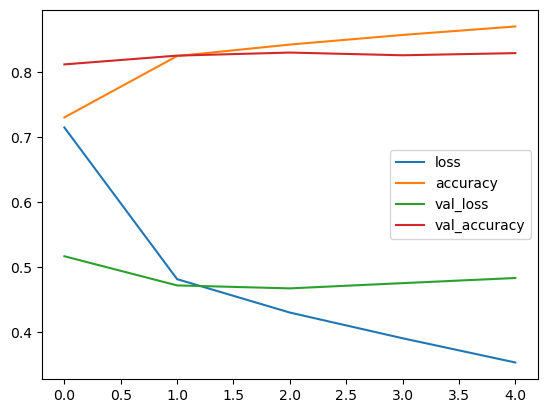

In [44]:
pd.DataFrame(model_1_history.history).plot()

In [45]:
def model_predict(model, X):
    y_values = np.argmax(model.predict(X), axis=1)
    print(y_values.shape)
    return y_encoder.inverse_transform(y_values)

model_1_predictions = model_predict(model_1, X_val)
model_1_predictions[:10]

945/945 [==============================] - 4s 3ms/step
(30212,)


array(['BACKGROUND', 'BACKGROUND', 'OBJECTIVE', 'METHODS', 'METHODS',
       'RESULTS', 'RESULTS', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
      dtype='<U11')

In [46]:
show_sample_predictions(model_1_predictions)

,Sentence,True Label,Prediction,Correct?
0,IgE sensitization to Aspergillus fumigatus and...,BACKGROUND,BACKGROUND,True
1,It is not clear whether these patients would b...,BACKGROUND,BACKGROUND,True
2,We sought to determine whether a 3-month cours...,OBJECTIVE,OBJECTIVE,True
3,Asthmatic patients who were IgE sensitized to ...,METHODS,METHODS,True
4,Primary outcomes were improvement in quality o...,METHODS,METHODS,True
5,Sixty-five patients were randomized .,RESULTS,RESULTS,True
6,Fifty-nine patients started treatment ( 32 rec...,RESULTS,RESULTS,True
7,Fifty-six patients took the full 3 months of m...,RESULTS,METHODS,False
8,"Between the voriconazole and placebo groups , ...",RESULTS,RESULTS,True
9,We were unable to show a beneficial effect of ...,CONCLUSIONS,CONCLUSIONS,True


In [47]:
score_predictions(y_val, model_1_predictions)

{'precision': 0.8286074284992948,
 'recall': 0.829306235932742,
 'f1': 0.8271432417180798}